In [65]:
from qiskit import *
q = QuantumRegister(5,"q")
c = ClassicalRegister(5,"c")
circuit = QuantumCircuit(q,c)


circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])
circuit.x(q[4])
circuit.u1(-0.0706860, q[0])
circuit.u1(-0.1335178, q[1])
circuit.u1(-0.2356196, q[2])
circuit.u1(-0.3141594, q[3])
circuit.cx(q[4],q[0])
circuit.u1(0.3848452, q[0])
circuit.cx(q[4],q[1])
circuit.u1(0.6047566, q[1])
circuit.h(q[0])
circuit.cx(q[4],q[2])
circuit.u1(1.0210178, q[2])
circuit.h(q[1])
circuit.cx(q[4],q[3])
circuit.u1(1.8849556, q[3])
circuit.h(q[2])
circuit.h(q[3])
circuit.measure(q[3], c[3])
circuit.measure(q[2], c[2])
circuit.measure(q[1], c[1])
circuit.measure(q[0], c[0])
circuit.measure(q[4], c[4])

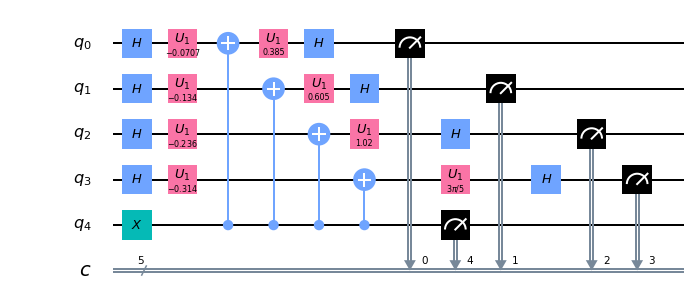

In [66]:
circuit.draw(output='mpl')

In [67]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()

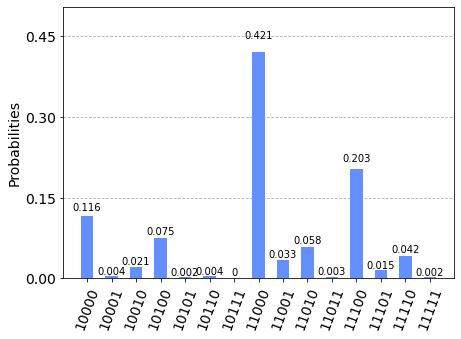

In [68]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [69]:
IBMQ.load_account()
provider= IBMQ.get_provider()
provider.backends()

Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [70]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
job = execute(circuit,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [71]:
result = job.result()

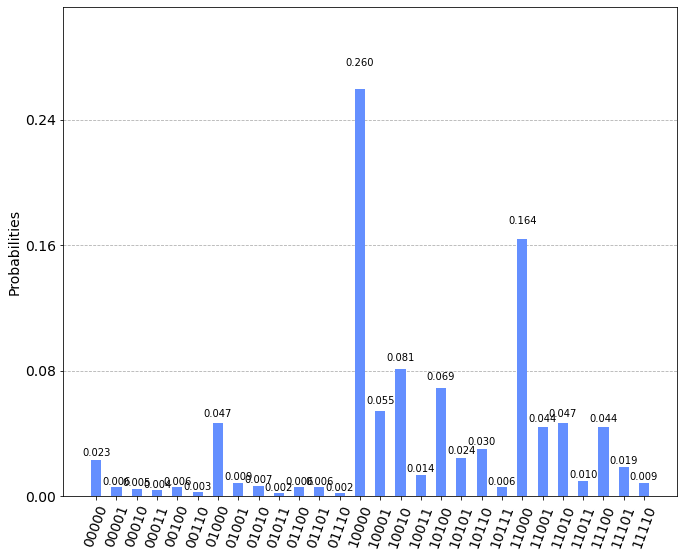

In [72]:
plot_histogram(result.get_counts(circuit), figsize=(11, 9))

In [73]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [74]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

Job Status: job has successfully run


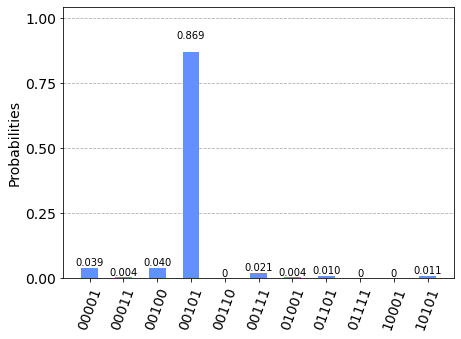

In [75]:
cal_circuits[2].draw(output='mpl')
len(cal_circuits)
cal_job = execute(cal_circuits, backend = qcomp, optimization_level = 0)
job_monitor(cal_job)
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[5])
              )

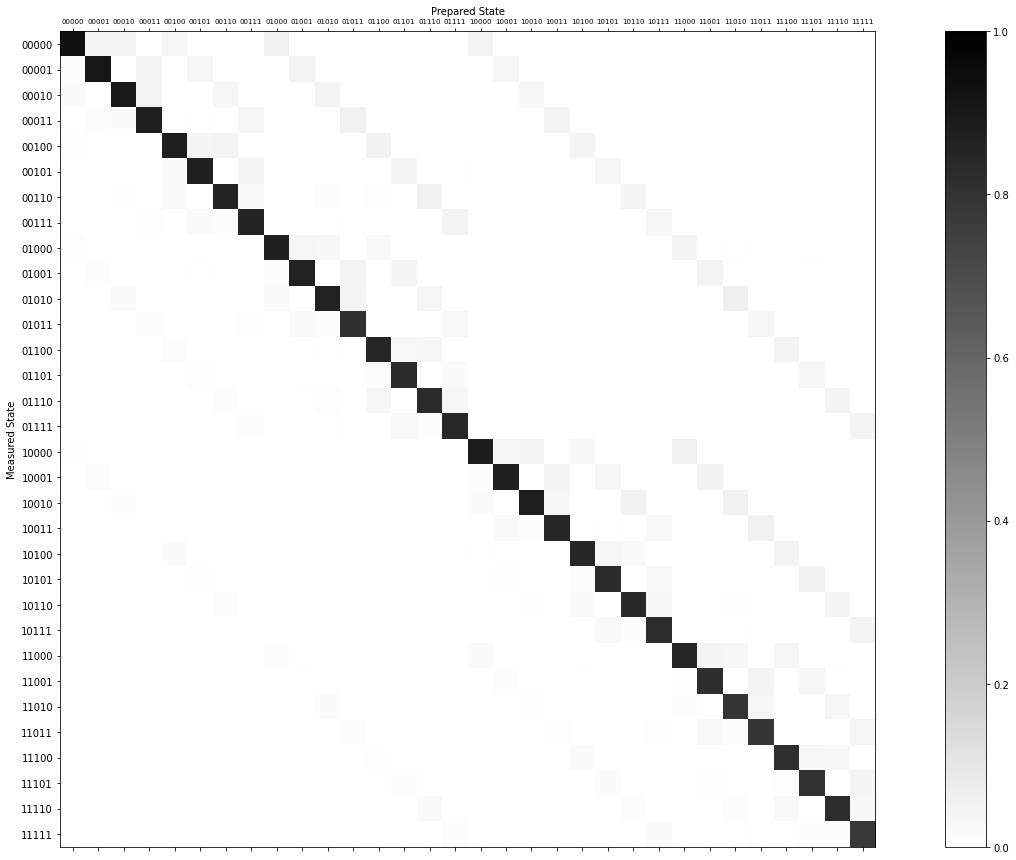

In [76]:
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=7) 
plt.rcParams["figure.figsize"] = (25,15)
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration(show_plot=True)

In [77]:
meas_filter = meas_fitter.filter

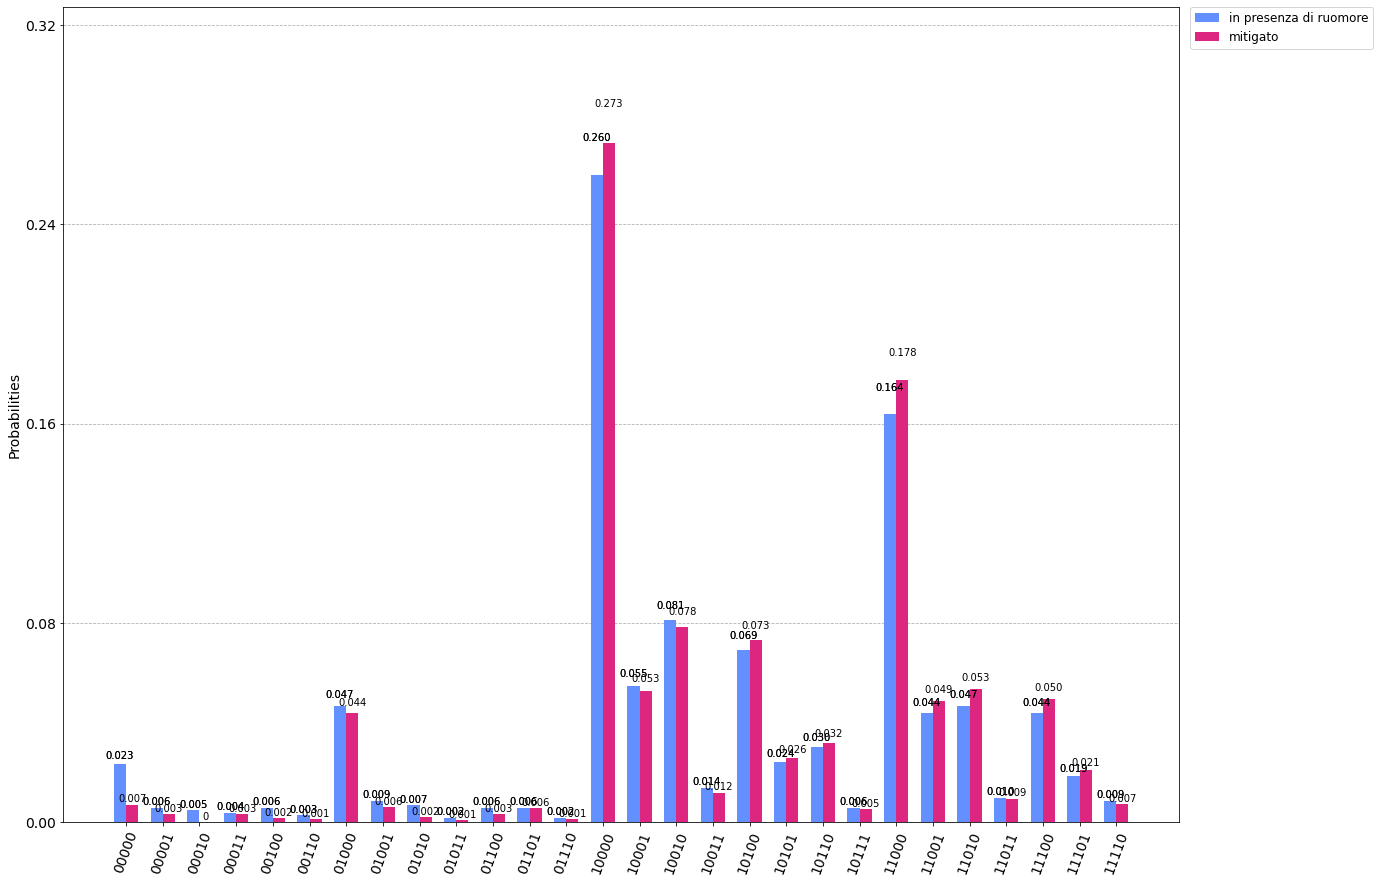

In [80]:
mitigated_results = meas_filter.apply(result)
device_counts = result.get_counts(circuit)
mitigated_counts = mitigated_results.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['in presenza di ruomore', 'mitigato'],figsize=(20,15))